<a href="https://colab.research.google.com/github/SonalGupta-02/summer19-Python/blob/master/ArtificialNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#loading data via pandas
import keras
import matplotlib.pyplot as mlt
import seaborn as sb
import pandas as pd

Using TensorFlow backend.


In [0]:
df=pd.read_csv('http://13.234.66.67/summer19/datasets/bank.csv')

In [3]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


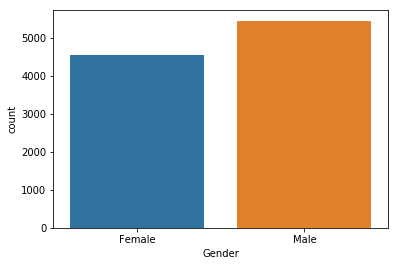

In [4]:
#countplot by seaborn
sb.countplot(df['Gender'])


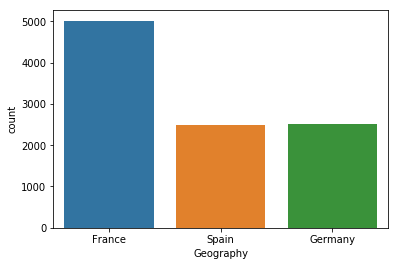

In [5]:
sb.countplot(df['Geography'])


In [6]:
#features and label of data
features=df.iloc[0:,3:13].values

features

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [7]:
# bank exit status
#finding label
labels=df.iloc[:,13:14].values
labels.shape

(10000, 1)

In [0]:
#to convert string data into numeric we apply label encoding
from sklearn.preprocessing import LabelEncoder


In [0]:
countenc=LabelEncoder() #function call


In [0]:
# fit country and transform into a number
features[0:,1]=countenc.fit_transform(features[0:,1])


In [0]:
# same is done for gender
features[0:,2]=countenc.fit_transform(features[0:,2])


In [0]:
# creating dummy variables using onehot encoder
from sklearn.preprocessing import OneHotEncoder


In [0]:
#calling function
counthot=OneHotEncoder(categorical_features=[1])


In [14]:
# fit and transform
features=counthot.fit_transform(features).toarray()
features1=features[:,1:]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [15]:
features1.shape

(10000, 11)

In [0]:
# training and testing
from sklearn.model_selection import train_test_split


In [0]:
X,x,Y,y=train_test_split(features1,labels,test_size=0.2)


In [0]:
#feature scaling
from sklearn.preprocessing import StandardScaler


In [0]:
sc=StandardScaler()


In [0]:
#training data scale
X=sc.fit_transform(X)


In [0]:
#testing data transform
x=sc.transform(x)


In [22]:
#X
x.shape


(2000, 11)

In [23]:
#X
X.shape


(8000, 11)

In [0]:
# now we can create ANN model


import keras  # this is the way of using tensorflow in background

# keras ANN model library import
from keras.models import Sequential
# this will offer external model of ANN


In [0]:
# filling data in each layer
from keras.layers import Dense  #this will create or give the method to decide the activation function 
#and number of nodws in each layer including input and output layer


In [26]:
#now we can design MODEL
model=Sequential()


W0709 18:15:41.597784 140153431848832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [27]:
# now we can add input layer 
model.add(Dense(6,input_shape=(11,)))
# relu --means rectifier activation function


W0709 18:16:09.659193 140153431848832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 18:16:09.677373 140153431848832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
# adding one more hidden layer
model.add(Dense(6,activation='relu'))
# note wee don't have to  assign number of inputs after first / input layer


In [0]:
# final layer adding
model.add(Dense(1,activation='sigmoid'))


In [30]:
# compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# optimizer ---weight adjust method --stochitis g d (adam)


W0709 18:17:04.828868 140153431848832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0709 18:17:04.867830 140153431848832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0709 18:17:04.878123 140153431848832 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [31]:
#training data fit
model.fit(X,Y,batch_size=25,epochs=100)


W0709 18:17:32.489609 140153431848832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
8000/8000 [==============================] - 1s 154us/step - loss: 0.6144 - acc: 0.7051
Epoch 2/100
8000/8000 [==============================] - 1s 65us/step - loss: 0.4712 - acc: 0.8052
Epoch 3/100
8000/8000 [==============================] - 0s 61us/step - loss: 0.4258 - acc: 0.8130
Epoch 4/100
8000/8000 [==============================] - 0s 54us/step - loss: 0.4052 - acc: 0.8206
Epoch 5/100
8000/8000 [==============================] - 0s 52us/step - loss: 0.3868 - acc: 0.8290
Epoch 6/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.3714 - acc: 0.8400
Epoch 7/100
8000/8000 [==============================] - 0s 53us/step - loss: 0.3622 - acc: 0.8449
Epoch 8/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3570 - acc: 0.8469
Epoch 9/100
8000/8000 [==============================] - 0s 49us/step - loss: 0.3540 - acc: 0.8496
Epoch 10/100
8000/8000 [==============================] - 0s 48us/step - loss: 0.3518 - acc: 0.8525
Epoch 11

In [32]:
model.predict(x) #now predict and test


array([[0.22886845],
       [0.03594017],
       [0.12063298],
       ...,
       [0.43139622],
       [0.09268537],
       [0.24289656]], dtype=float32)

In [0]:
# accuracy score --- confusion matrix
#Stock market data= mutual fund customer list==dataset for ann